In [3]:
from openpiv import tools, process, validation, filters, scaling, pyprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
frame_a  = tools.imread( 'exp1_001_b.bmp' )
frame_b  = tools.imread( 'exp1_001_c.bmp' )

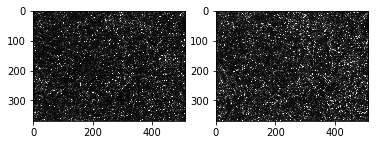

In [5]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


In [6]:
winsize = 24 # pixels
searchsize = 64  # pixels, search in image B
overlap = 12 # pixels
dt = 0.02 # sec
u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )

In [7]:
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )

In [8]:
u, v, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.3 )

In [9]:
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)

In [10]:
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

In [11]:
tools.save(x, y, u, v, mask, 'exp1_001.txt' )

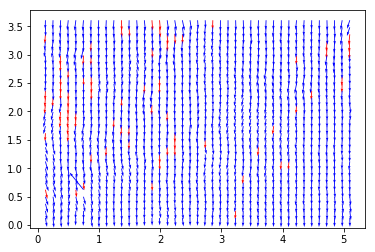

In [12]:
tools.display_vector_field('exp1_001.txt', scale=100, width=0.0025)

## Use any pair of images that you can access via URL
For instance we can use images from PIV Challenge http://www.pivchallenge.org/

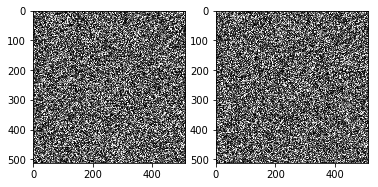

In [14]:
frame_a = tools.imread('http://www.pivchallenge.org/pub/B/B001_1.tif')
frame_b = tools.imread('http://www.pivchallenge.org/pub/B/B001_2.tif')
fig,ax = plt.subplots(1,2)
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

In [21]:
winsize = 32 # pixels
searchsize = 64  # pixels, search in image B
overlap = 16 # pixels
dt = 1.0 # sec
u0, v0, sig2noise = process.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=winsize, overlap=overlap, dt=dt, search_area_size=searchsize, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )
u, v, mask = validation.sig2noise_val( u0, v0, sig2noise, threshold = 1.1 )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
# x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 96.52 )

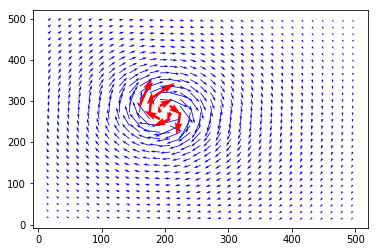

In [22]:
plt.figure()
plt.quiver(x,y,u,v,color='b')
plt.quiver(x[mask],y[mask],u[mask],v[mask],color='r')